In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_1797/555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Первичный анализ

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df["Satisfaction"].value_counts()

Satisfaction
Satisfied                  51914
Neutral or Dissatisfied    33053
Name: count, dtype: int64

In [4]:
train_df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,37576,Male,46,Returning,Business,Business,1608,0,0.0,1,...,5,5,5,3,2,5,1,5,5,Satisfied
1,56913,Male,30,Returning,Business,Business,1379,30,32.0,5,...,3,1,5,1,1,3,1,1,3,Neutral or Dissatisfied
2,6541,Female,50,Returning,Business,Business,414,0,0.0,5,...,4,5,4,5,3,4,5,4,4,Satisfied
3,40646,Female,48,Returning,Business,Economy,95,0,0.0,3,...,5,1,5,2,1,5,5,5,5,Satisfied
4,29947,Female,24,Returning,Business,Economy Plus,143,0,0.0,5,...,5,1,2,1,1,3,0,1,5,Satisfied


In [5]:
test_df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
0,98190,Female,46,First-time,Business,Economy,978,0,8.0,3,...,1,4,5,4,5,5,1,3,5,2
1,107961,Female,21,First-time,Business,Economy,1005,0,20.0,1,...,3,3,4,4,4,4,4,1,4,4
2,129503,Female,39,Returning,Personal,Economy,954,18,3.0,5,...,2,4,5,3,3,3,5,1,3,5
3,92408,Male,22,Returning,Personal,Business,765,0,0.0,5,...,3,5,2,2,2,2,5,2,2,5
4,117611,Male,48,Returning,Business,Business,2123,9,0.0,4,...,4,2,4,2,3,1,2,2,2,2


In [6]:
print(f"rows in training data: {train_df.shape[0]}")
print(f"rows in test data: {test_df.shape[0]}")

rows in training data: 84967
rows in test data: 44913


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84967 entries, 0 to 84966
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ID                                      84967 non-null  int64  
 1   Gender                                  84967 non-null  object 
 2   Age                                     84967 non-null  int64  
 3   Customer Type                           84967 non-null  object 
 4   Type of Travel                          84967 non-null  object 
 5   Class                                   84967 non-null  object 
 6   Flight Distance                         84967 non-null  int64  
 7   Departure Delay                         84967 non-null  int64  
 8   Arrival Delay                           84705 non-null  float64
 9   Departure and Arrival Time Convenience  84967 non-null  int64  
 10  Ease of Online Booking                  84967 non-null  in

In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44913 entries, 0 to 44912
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ID                                      44913 non-null  int64  
 1   Gender                                  44913 non-null  object 
 2   Age                                     44913 non-null  int64  
 3   Customer Type                           44913 non-null  object 
 4   Type of Travel                          44913 non-null  object 
 5   Class                                   44913 non-null  object 
 6   Flight Distance                         44913 non-null  int64  
 7   Departure Delay                         44913 non-null  int64  
 8   Arrival Delay                           44782 non-null  float64
 9   Departure and Arrival Time Convenience  44913 non-null  int64  
 10  Ease of Online Booking                  44913 non-null  in

In [9]:
train_df.isna().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             262
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [10]:
test_df.isna().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             131
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

<Axes: xlabel='Arrival Delay', ylabel='Count'>

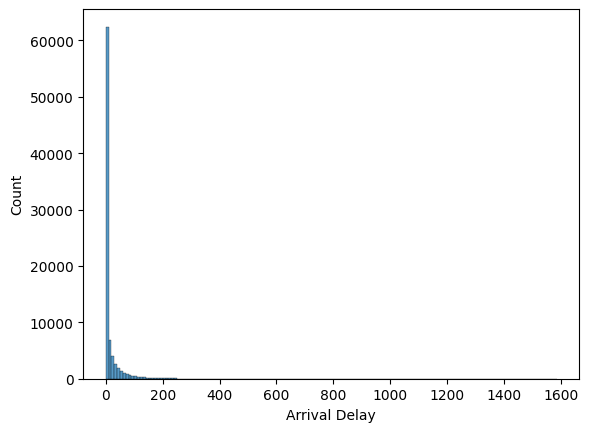

In [11]:
sns.histplot(train_df["Arrival Delay"], binwidth=10)

<Axes: xlabel='Arrival Delay', ylabel='Count'>

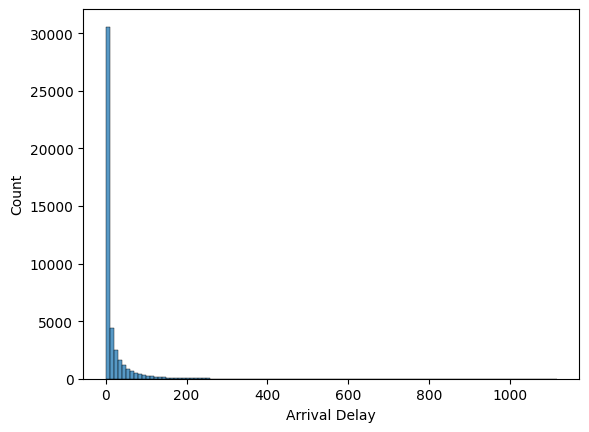

In [12]:
sns.histplot(test_df["Arrival Delay"], binwidth=10)

In [13]:
print(
    train_df[
        (train_df["Arrival Delay"] == 0) & (train_df["Satisfaction"] == "Satisfied")
    ].size
    / train_df.size
    * 100,
    "%",
)
print(
    train_df[
        (train_df["Arrival Delay"] == 0) & (train_df["Satisfaction"] != "Satisfied")
    ].size
    / train_df.size
    * 100,
    "%",
)

37.370979321383594 %
20.183129921028165 %


In [14]:
print(
    train_df[
        (train_df["Arrival Delay"] > 0) & (train_df["Satisfaction"] == "Satisfied")
    ].size
    / train_df.size
    * 100,
    "%",
)
print(
    train_df[
        (train_df["Arrival Delay"] > 0) & (train_df["Satisfaction"] != "Satisfied")
    ].size
    / train_df.size
    * 100,
    "%",
)

23.544434898254615 %
18.593100850918592 %


Можем заметить, что при отсутствии времени задержки пассажир остаётся в 2 раза чаще удовлетворён, возможно этот критерий имеет сильное влияние на итоговый результат

In [15]:
print(train_df[(train_df["Arrival Delay"] < 10)].size / train_df.size * 100, "%")

72.43164993468052 %


In [16]:
train_df[train_df["Arrival Delay"] < 10]["Arrival Delay"].mean()

0.9154412362088296

In [17]:
train_df.loc[train_df["Arrival Delay"].isna(), "Arrival Delay"] = np.random.exponential(
    2, train_df["Arrival Delay"].isna().sum()
)

In [18]:
test_df.loc[test_df["Arrival Delay"].isna(), "Arrival Delay"] = np.random.exponential(
    2, test_df["Arrival Delay"].isna().sum()
)

# Визуальный анализ признаков

In [19]:
train_df.dtypes

ID                                          int64
Gender                                     object
Age                                         int64
Customer Type                              object
Type of Travel                             object
Class                                      object
Flight Distance                             int64
Departure Delay                             int64
Arrival Delay                             float64
Departure and Arrival Time Convenience      int64
Ease of Online Booking                      int64
Check-in Service                            int64
Online Boarding                             int64
Gate Location                               int64
On-board Service                            int64
Seat Comfort                                int64
Leg Room Service                            int64
Cleanliness                                 int64
Food and Drink                              int64
In-flight Service                           int64


In [20]:
test_id = test_df["ID"]

train_df.drop('ID', inplace=True, axis=1)
test_df.drop('ID', inplace=True, axis=1)

In [21]:
cat_features = train_df.select_dtypes("object").columns.tolist()
num_features = [
    "Age",
    "Flight Distance",
    "Departure Delay",
    "Arrival Delay",
]
rating_features = [
    "Departure and Arrival Time Convenience",
    "Ease of Online Booking",
    "Check-in Service",
    "Online Boarding",
    "Gate Location",
    "On-board Service",
    "Seat Comfort",
    "Leg Room Service",
    "Cleanliness",
    "Food and Drink",
    "In-flight Service",
    "In-flight Wifi Service",
    "In-flight Entertainment",
    "Baggage Handling",
]

In [22]:
len(cat_features + rating_features)

19

/tmp/ipykernel_1797/1525933931.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = cat, data=train_df, ax=axes[i // 5, i % 5], palette="summer")#, hue= 'Satisfaction');
/tmp/ipykernel_1797/1525933931.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = cat, data=train_df, ax=axes[i // 5, i % 5], palette="summer")#, hue= 'Satisfaction');
/tmp/ipykernel_1797/1525933931.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = cat, data=train_df, ax=axes[i // 5, i % 5], palette="summer")#, hue= 'Satisfaction');
/tmp/ipykernel_1797/15

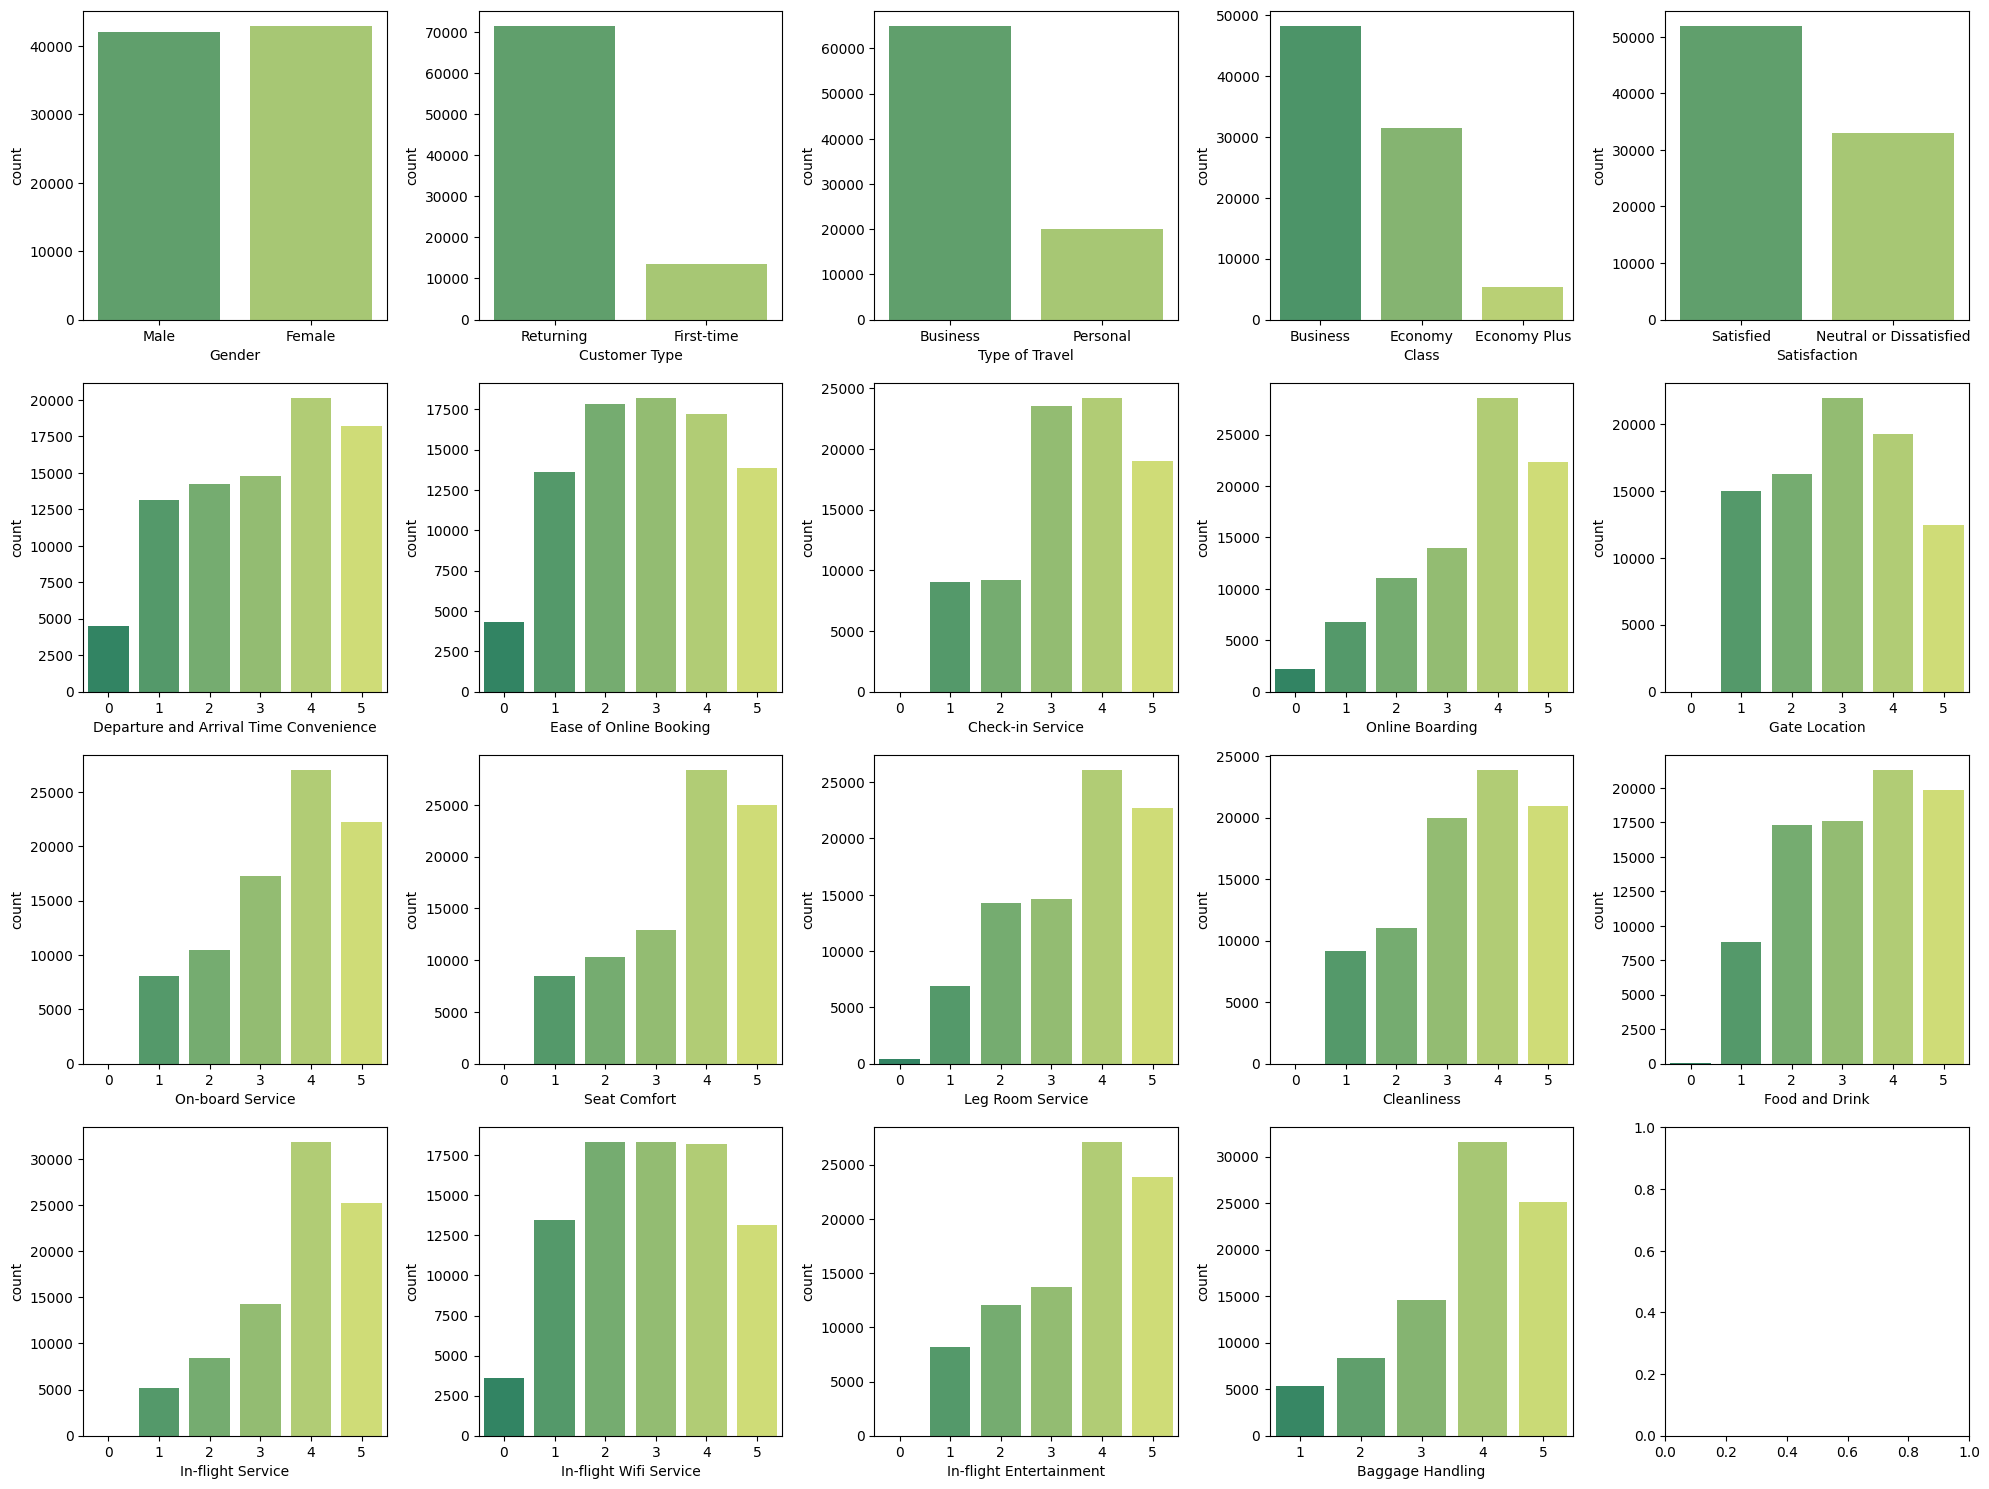

In [23]:
fig, axes = plt.subplots(4, 5, figsize = (20, 15))

for i, cat in enumerate(cat_features + rating_features):
    sns.countplot(x = cat, data=train_df, ax=axes[i // 5, i % 5], palette="summer")#, hue= 'Satisfaction');

plt.tight_layout()
plt.show()


/tmp/ipykernel_1797/3416588727.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = cat, data=test_df, ax=axes[i // 5, i % 5], palette="summer");
/tmp/ipykernel_1797/3416588727.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = cat, data=test_df, ax=axes[i // 5, i % 5], palette="summer");
/tmp/ipykernel_1797/3416588727.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = cat, data=test_df, ax=axes[i // 5, i % 5], palette="summer");
/tmp/ipykernel_1797/3416588727.py:5: FutureWarning: 

Passing `palette` without assigning `hue

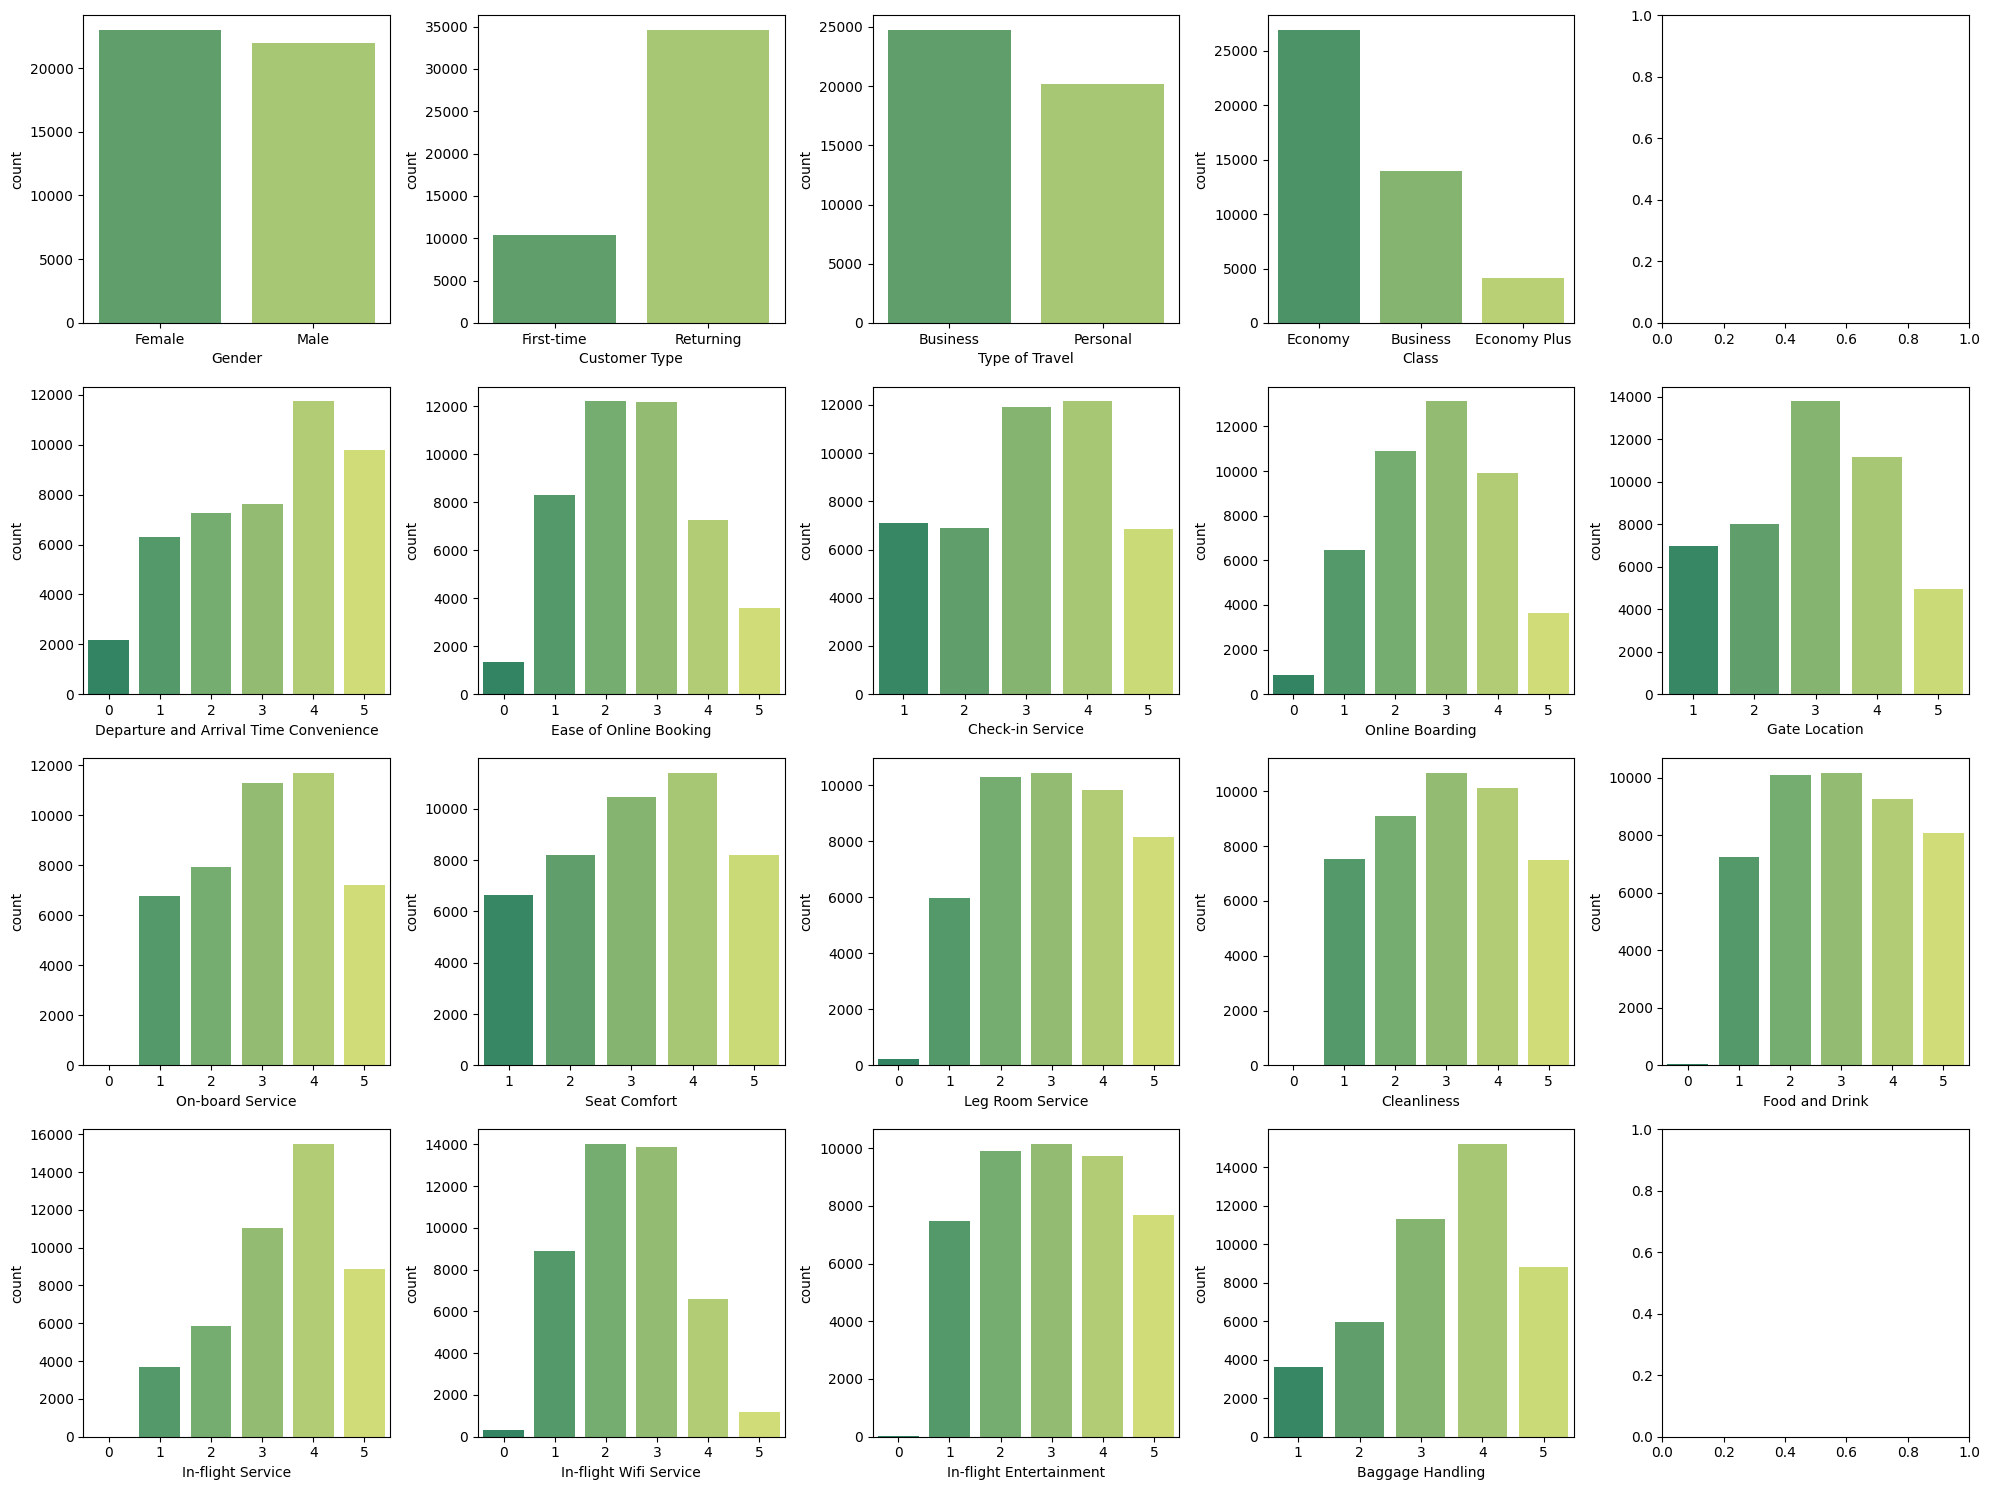

In [24]:
fig, axes = plt.subplots(4, 5, figsize = (20, 15))

for i, cat in enumerate(cat_features + rating_features):
    if cat == "Satisfaction": continue
    sns.countplot(x = cat, data=test_df, ax=axes[i // 5, i % 5], palette="summer");

plt.tight_layout()
plt.show()


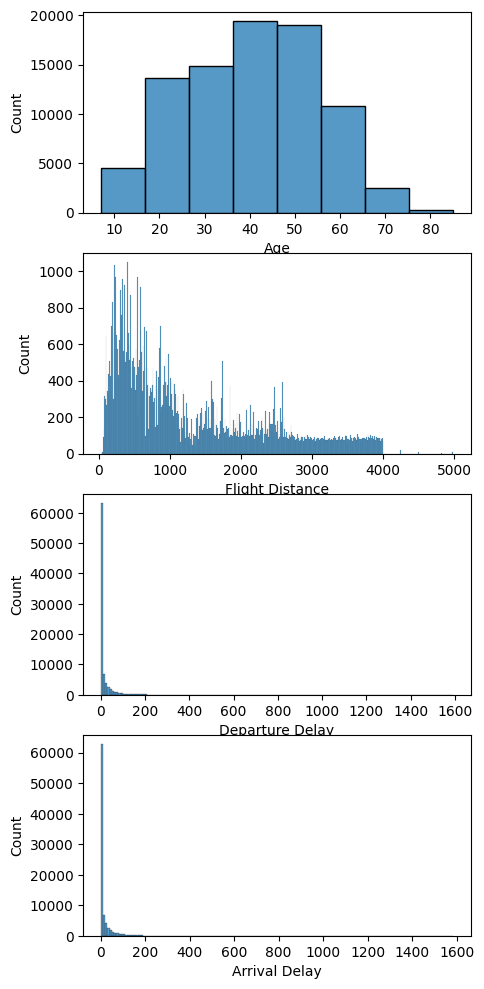

In [25]:
fig, axes = plt.subplots(4, 1, figsize = (5, 12))

for i, cat in enumerate(num_features):
    sns.histplot(x = cat, data=train_df, ax=axes[i], binwidth=10);

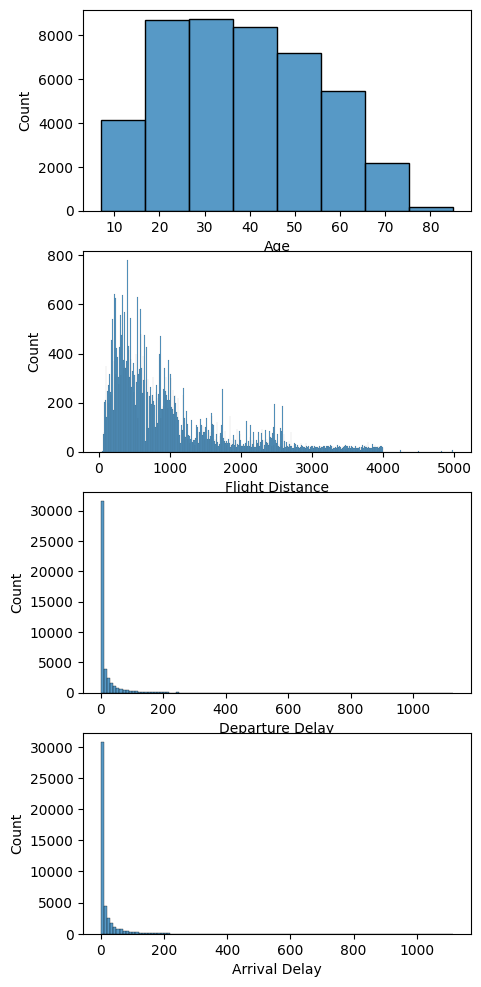

In [26]:
fig, axes = plt.subplots(4, 1, figsize = (5, 12))

for i, cat in enumerate(num_features):
    sns.histplot(x = cat, data=test_df, ax=axes[i], binwidth=10);

## Заметим, что в flight distance идёт резкий обрыв после 4000, будем считать всё что больше выбросами

In [27]:
train_df = train_df.drop(train_df[train_df["Flight Distance"] > 4000].index)

# Процессинг признаков

Заменим категориальный признаки на числовые

In [28]:
train_df[cat_features]

,Gender,Customer Type,Type of Travel,Class,Satisfaction
0,Male,Returning,Business,Business,Satisfied
1,Male,Returning,Business,Business,Neutral or Dissatisfied
2,Female,Returning,Business,Business,Satisfied
3,Female,Returning,Business,Economy,Satisfied
4,Female,Returning,Business,Economy Plus,Satisfied
...,...,...,...,...,...
84962,Male,First-time,Business,Business,Neutral or Dissatisfied
84963,Male,Returning,Personal,Economy Plus,Neutral or Dissatisfied
84964,Female,Returning,Personal,Economy,Neutral or Dissatisfied
84965,Male,Returning,Business,Business,Satisfied


## Категориальные признаки имеют внутренний порядок, поэтому можно заменить их числовыми lables

In [29]:
train_df['Gender'] = train_df['Gender'].map({'Male' : 0, 'Female' : 1})
train_df['Customer Type'] = train_df['Customer Type'].map({'Returning' : 0, 'First-time' : 1})
train_df['Type of Travel'] = train_df['Type of Travel'].map({'Personal' : 0, 'Business' : 1})
train_df['Class'] = train_df['Class'].map({'Business' : 2, 'Economy Plus' : 1, 'Economy' : 0})
train_df['Satisfaction'] = train_df['Satisfaction'].map({'Neutral or Dissatisfied' : 0, 'Satisfied' : 1})

test_df['Gender'] = test_df['Gender'].map({'Male' : 0, 'Female' : 1})
test_df['Customer Type'] = test_df['Customer Type'].map({'Returning' : 0, 'First-time' : 1})
test_df['Type of Travel'] = test_df['Type of Travel'].map({'Personal' : 0, 'Business' : 1})
test_df['Class'] = test_df['Class'].map({'Business' : 2, 'Economy Plus' : 1, 'Economy' : 0})

In [30]:
train_df.dtypes

Gender                                      int64
Age                                         int64
Customer Type                               int64
Type of Travel                              int64
Class                                       int64
Flight Distance                             int64
Departure Delay                             int64
Arrival Delay                             float64
Departure and Arrival Time Convenience      int64
Ease of Online Booking                      int64
Check-in Service                            int64
Online Boarding                             int64
Gate Location                               int64
On-board Service                            int64
Seat Comfort                                int64
Leg Room Service                            int64
Cleanliness                                 int64
Food and Drink                              int64
In-flight Service                           int64
In-flight Wifi Service                      int64


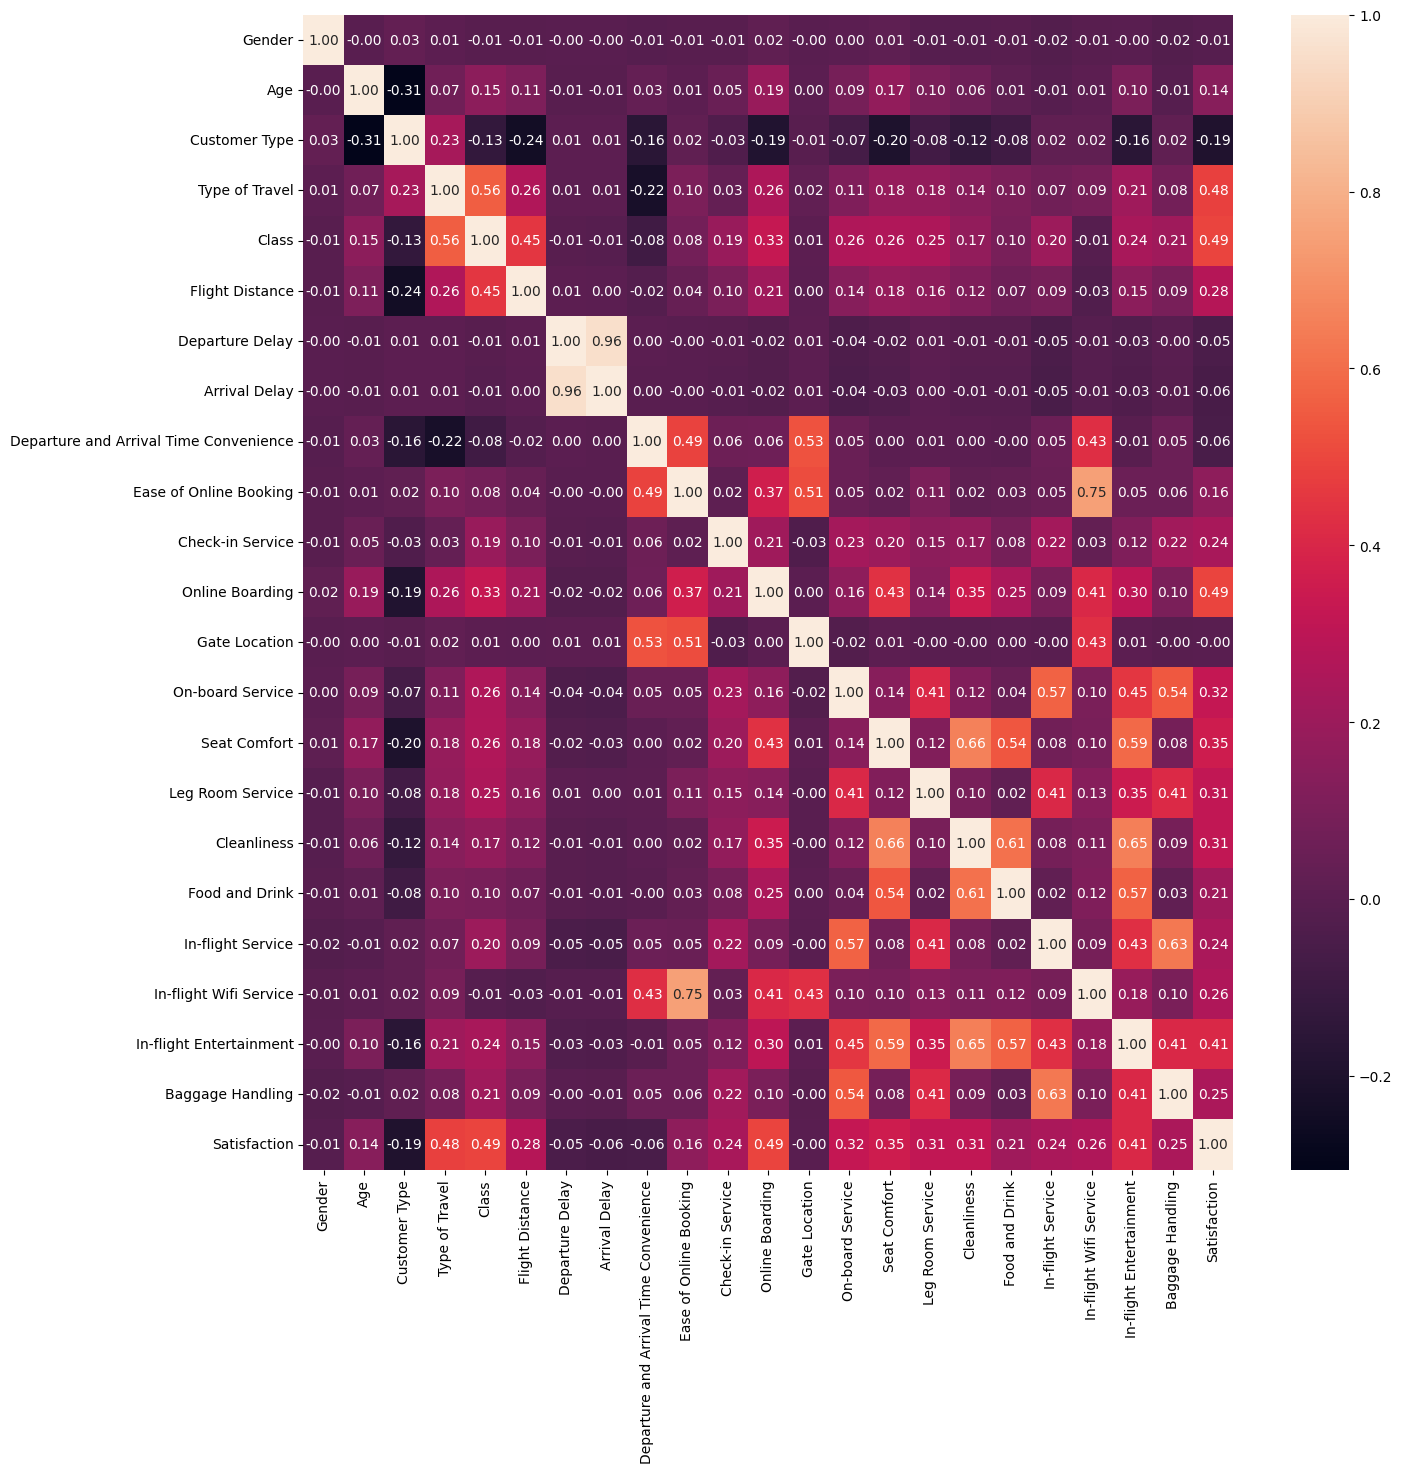

In [31]:
plt.figure(figsize=(15, 15))
sns.heatmap(train_df.corr(), annot=True, fmt=".2f");

# Выбор модели

In [32]:
X, Y = train_df.drop("Satisfaction", axis=1), train_df["Satisfaction"]

In [33]:
# Testing

# from sklearn.preprocessing import PolynomialFeatures


# poly = PolynomialFeatures(degree=2)

# X = poly.fit_transform(X)

In [34]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [35]:
from sklearn.model_selection import train_test_split


x_train, x_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.20)

x_train_scaled, x_valid_scaled = scaler.transform(x_train), scaler.transform(x_valid)

In [36]:
knn_clf = KNeighborsClassifier(n_neighbors= 3)
knn_clf.fit(x_train_scaled, y_train)

y_pred = knn_clf.predict(x_valid_scaled)
print("F1 score on the valid set:", round(f1_score(y_valid, y_pred, average="micro"), 3))

F1 score on the valid set: 0.921


In [37]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(class_weight={0: 10, 1: 1})

log_reg.fit(x_train, y_train)

y_pred = log_reg.predict(x_valid_scaled)

round(f1_score(y_valid, y_pred, average="micro"), 3)

/home/egorl/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/egorl/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.759

In [38]:
from sklearn.metrics import classification_report


print(classification_report(y_valid, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.639     0.872     0.737      6596
           1      0.895     0.687     0.777     10387

    accuracy                          0.759     16983
   macro avg      0.767     0.780     0.757     16983
weighted avg      0.795     0.759     0.762     16983



In [39]:
f1_scores = []
for i in range(1, 20):
    
    knn_clf = KNeighborsClassifier(n_neighbors=i, n_jobs=-2)
    knn_clf.fit(x_train_scaled ,y_train)
    pred_i = knn_clf.predict(x_valid_scaled)
    accuracy_i = f1_score(y_valid, pred_i, average="micro")
    f1_scores.append(accuracy_i)

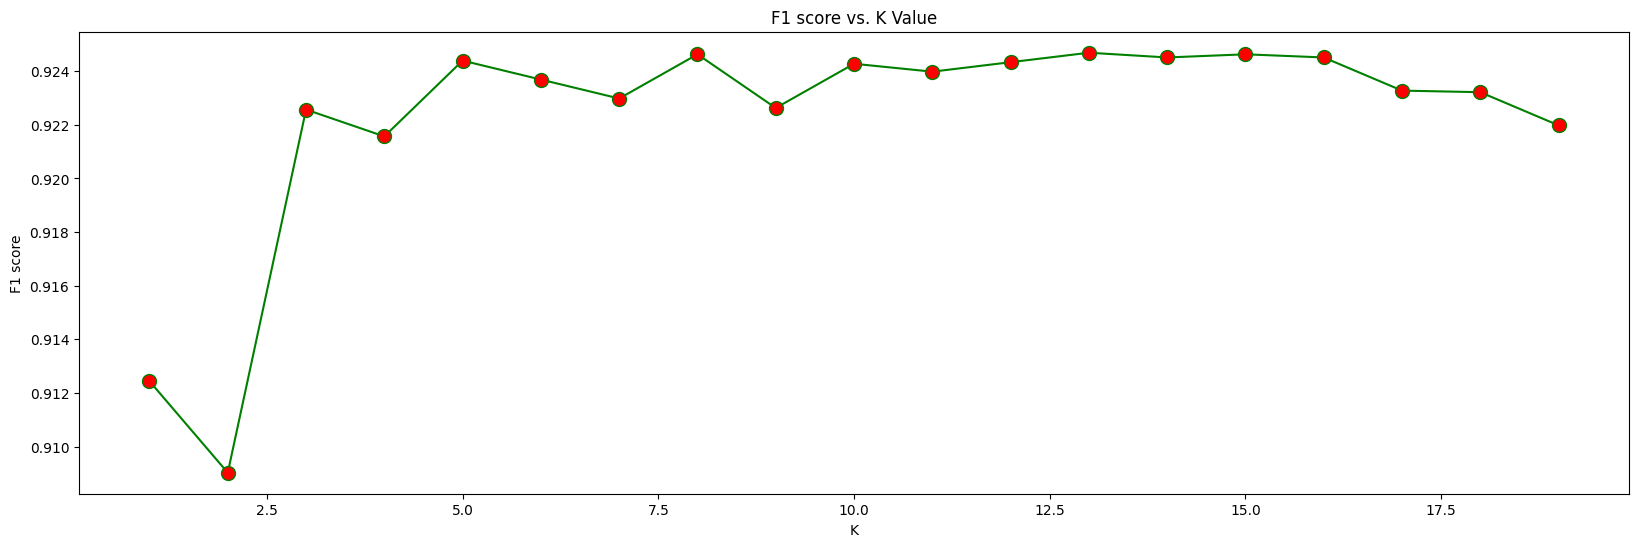

In [145]:
plt.figure(figsize=(20,6))
plt.plot(range(1,20, 1), f1_scores, color='green', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('F1 score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1 score')
plt.show()

In [41]:
knn_clf = KNeighborsClassifier(n_neighbors = 5)
knn_clf.fit(x_train_scaled, y_train)
y_pred = knn_clf.predict(x_valid_scaled)

In [42]:
f1 = f1_score(y_valid, y_pred, average="micro")
print(f"F1 score: {round(f1, 2)}")

F1 score: 0.92


In [39]:
from sklearn.ensemble import RandomForestClassifier


rf_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-2)

rf_clf.fit(x_train_scaled, y_train)

y_pred_rf = rf_clf.predict(x_valid_scaled)


f1_score_rf = f1_score(y_valid, y_pred_rf, average="micro")
print(f'Random Forest f1_score: {f1_score_rf:.2f}')

print(classification_report(y_valid, y_pred_rf))

Random Forest f1_score: 0.96
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      6596
           1       0.96      0.97      0.97     10387

    accuracy                           0.96     16983
   macro avg       0.96      0.95      0.95     16983
weighted avg       0.96      0.96      0.96     16983



In [131]:
from catboost import CatBoostClassifier

cb_clf = CatBoostClassifier(
    iterations=600,
    learning_rate=0.03,
    loss_function="Logloss",
    custom_loss=['F1', 'Accuracy'],
    class_weights={0: 15, 1: 1},
)

cb_clf.fit(
    x_train_scaled, y_train,
    eval_set=(x_valid_scaled, y_valid),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [132]:
# Testing

x_test = test_df
# x_test = poly.transform(x_test)
x_test_scaled = scaler.transform(x_test)

In [133]:

rf_clf.fit(X_scaled, Y)


y_test_pred = rf_clf.predict(x_test_scaled)

y_test_pred_series = pd.DataFrame({"ID" : test_id, "Satisfaction" : y_test_pred})
y_test_pred_series.to_csv("random_forest.csv", index_label="ID", index=False)
y_test_pred_series

,ID,Satisfaction
0,98190,0
1,107961,0
2,129503,0
3,92408,0
4,117611,0
...,...,...
44908,117154,0
44909,101603,1
44910,105970,0
44911,89524,0


In [134]:
cb_clf.fit(
    X_scaled, Y,
    eval_set=(x_valid_scaled, y_valid),
    verbose=False,
    plot=True
)

y_test_pred = cb_clf.predict(x_test_scaled)

y_test_pred_series = pd.DataFrame({"ID" : test_id, "Satisfaction" : y_test_pred})
y_test_pred_series.to_csv("catboost.csv", index_label="ID", index=False)
y_test_pred_series

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

,ID,Satisfaction
0,98190,0
1,107961,0
2,129503,0
3,92408,0
4,117611,0
...,...,...
44908,117154,0
44909,101603,0
44910,105970,0
44911,89524,0


In [148]:
knn_clf.fit(X_scaled, Y)

y_test_pred = knn_clf.predict(x_test_scaled)

y_test_pred_series = pd.DataFrame({"ID" : test_id, "Satisfaction" : y_test_pred})
y_test_pred_series.to_csv("knn.csv", index_label="ID", index=False)
y_test_pred_series

,ID,Satisfaction
0,98190,0
1,107961,0
2,129503,0
3,92408,0
4,117611,0
...,...,...
44908,117154,0
44909,101603,1
44910,105970,0
44911,89524,0
